In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM

In [25]:
from tensorflow.keras.datasets import imdb

# 등장빈도가 500위 안에 있는 단어만
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

In [26]:
x_train = x_train[:2500]
x_test = x_test[:2500]
y_train = y_train[:2500]
y_test = y_test[:2500]

In [27]:
print(x_train.shape, x_test.shape)

(2500,) (2500,)


In [28]:
x_train[:4]

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [29]:
# 감정 분석(긍정/부정) binary cls
y_train[:4]

array([1, 0, 0, 1])

In [30]:
lengths = [len(line) for line in x_train]

In [ ]:
plt.hist(lengths, bins=100)

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 길이가 200보다 크면 앞쪽을 자르고, 길이가 200보다 작으면 앞을 0으로 채워준다
x_train_seq = pad_sequences(x_train, maxlen=200)
x_test_seq = pad_sequences(x_test, maxlen=200)

In [33]:
print(x_train_seq.shape, x_test_seq.shape)

(2500, 200) (2500, 200)


In [34]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,1)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [36]:
# validation_data는 학습하기 위한 용도는 아니며 loss와 model의 metrics(보통 accuracy)를 평가하기위해 사용된다.
model.fit(x_train_seq.astype(float), y_train, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float), y_test))

Epoch 1/10
40/40 [==============================] - 9s 213ms/step - loss: 0.7551 - accuracy: 0.5012 - val_loss: 0.7488 - val_accuracy: 0.4780
Epoch 2/10
40/40 [==============================] - 8s 205ms/step - loss: 0.7228 - accuracy: 0.4988 - val_loss: 0.7219 - val_accuracy: 0.4916
Epoch 3/10
40/40 [==============================] - 9s 217ms/step - loss: 0.7070 - accuracy: 0.4968 - val_loss: 0.7089 - val_accuracy: 0.4940
Epoch 4/10
40/40 [==============================] - 8s 207ms/step - loss: 0.7000 - accuracy: 0.4960 - val_loss: 0.7030 - val_accuracy: 0.4728
Epoch 5/10
40/40 [==============================] - 8s 209ms/step - loss: 0.6968 - accuracy: 0.5000 - val_loss: 0.6999 - val_accuracy: 0.4776
Epoch 6/10
40/40 [==============================] - 8s 205ms/step - loss: 0.6950 - accuracy: 0.5044 - val_loss: 0.6977 - val_accuracy: 0.4820
Epoch 7/10
40/40 [==============================] - 8s 204ms/step - loss: 0.6946 - accuracy: 0.5024 - val_loss: 0.6970 - val_accuracy: 0.4808
Epoch 

In [ ]:
# 전혀 학습이 안됨

In [37]:
# 단어기 때문에 category화 시킬 필요가 있다.
x_train_seq

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [207, 126, 110, ...,  30,   2, 133],
       [  2, 123,   6, ...,  95, 106,  15],
       [  2,   2,  34, ...,   2, 457, 158]], dtype=int32)

In [ ]:
# RNN

In [38]:
from tensorflow.keras.utils import to_categorical

x_train_oh = to_categorical(x_train_seq)
x_test_oh = to_categorical(x_test_seq)

In [39]:
x_train_oh.shape

(2500, 200, 500)

In [43]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,500)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [45]:
hist = model.fit(x_train_oh.astype(float), y_train, epochs=10, batch_size=64, validation_data=(x_test_oh.astype(float), y_test))

Epoch 1/10
40/40 [==============================] - 11s 255ms/step - loss: 0.6952 - accuracy: 0.5196 - val_loss: 0.6862 - val_accuracy: 0.5396
Epoch 2/10
40/40 [==============================] - 9s 226ms/step - loss: 0.6664 - accuracy: 0.6052 - val_loss: 0.6294 - val_accuracy: 0.6628
Epoch 3/10
40/40 [==============================] - 9s 225ms/step - loss: 0.6658 - accuracy: 0.6152 - val_loss: 0.6640 - val_accuracy: 0.5828
Epoch 4/10
40/40 [==============================] - 9s 225ms/step - loss: 0.6129 - accuracy: 0.6976 - val_loss: 0.5797 - val_accuracy: 0.7024
Epoch 5/10
40/40 [==============================] - 9s 227ms/step - loss: 0.5452 - accuracy: 0.7408 - val_loss: 0.5616 - val_accuracy: 0.7212
Epoch 6/10
40/40 [==============================] - 9s 229ms/step - loss: 0.5212 - accuracy: 0.7588 - val_loss: 0.5768 - val_accuracy: 0.6996
Epoch 7/10
40/40 [==============================] - 9s 225ms/step - loss: 0.4992 - accuracy: 0.7792 - val_loss: 0.5414 - val_accuracy: 0.7384
Epoch

In [ ]:
# LSTM

In [46]:
model = Sequential()
model.add(LSTM(8, input_shape=(200,500)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 16288     
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16,297
Trainable params: 16,297
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [48]:
hist = model.fit(x_train_oh.astype(float), y_train, epochs=10, batch_size=64, validation_data=(x_test_oh.astype(float), y_test))

Epoch 1/10
40/40 [==============================] - 8s 109ms/step - loss: 0.6926 - accuracy: 0.5204 - val_loss: 0.6915 - val_accuracy: 0.5192
Epoch 2/10
40/40 [==============================] - 2s 60ms/step - loss: 0.6896 - accuracy: 0.5332 - val_loss: 0.6904 - val_accuracy: 0.4968
Epoch 3/10
40/40 [==============================] - 2s 62ms/step - loss: 0.6855 - accuracy: 0.5912 - val_loss: 0.6857 - val_accuracy: 0.5480
Epoch 4/10
40/40 [==============================] - 2s 62ms/step - loss: 0.6758 - accuracy: 0.5856 - val_loss: 0.6576 - val_accuracy: 0.6624
Epoch 5/10
40/40 [==============================] - 2s 61ms/step - loss: 0.6250 - accuracy: 0.6960 - val_loss: 0.5923 - val_accuracy: 0.7412
Epoch 6/10
40/40 [==============================] - 2s 61ms/step - loss: 0.5558 - accuracy: 0.7476 - val_loss: 0.5336 - val_accuracy: 0.7736
Epoch 7/10
40/40 [==============================] - 2s 61ms/step - loss: 0.5214 - accuracy: 0.7776 - val_loss: 0.5231 - val_accuracy: 0.7588
Epoch 8/10
4

In [49]:
model = Sequential()
# Embedding : one-hot으로 바꾸지 않고, 500개의 date를 학습을 통해 16차원으로 바꿔라
model.add(Embedding(500, 16, input_length=200))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [55]:
hist = model.fit(x_train_seq.astype(float), y_train, epochs=16, batch_size=64, validation_data=(x_test_seq.astype(float), y_test))

Epoch 1/16
40/40 [==============================] - 2s 46ms/step - loss: 1.0716 - accuracy: 0.6280 - val_loss: 0.7516 - val_accuracy: 0.5992
Epoch 2/16
40/40 [==============================] - 2s 45ms/step - loss: 0.6335 - accuracy: 0.6668 - val_loss: 0.6809 - val_accuracy: 0.6256
Epoch 3/16
40/40 [==============================] - 2s 44ms/step - loss: 0.5991 - accuracy: 0.6804 - val_loss: 0.6551 - val_accuracy: 0.6324
Epoch 4/16
40/40 [==============================] - 2s 45ms/step - loss: 0.5821 - accuracy: 0.6960 - val_loss: 0.6415 - val_accuracy: 0.6352
Epoch 5/16
40/40 [==============================] - 2s 45ms/step - loss: 0.5699 - accuracy: 0.7008 - val_loss: 0.6330 - val_accuracy: 0.6464
Epoch 6/16
40/40 [==============================] - 2s 44ms/step - loss: 0.5602 - accuracy: 0.7032 - val_loss: 0.6252 - val_accuracy: 0.6516
Epoch 7/16
40/40 [==============================] - 2s 45ms/step - loss: 0.5516 - accuracy: 0.7096 - val_loss: 0.6196 - val_accuracy: 0.6552
Epoch 8/16
40

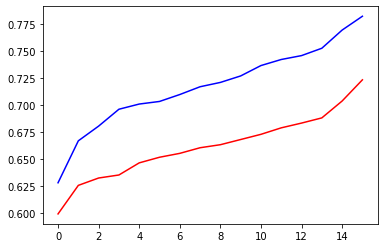

In [56]:
plt.plot(hist.history['accuracy'], c='b')
plt.plot(hist.history['val_accuracy'], c='r')